In [2]:
import pandas as pd

# Load dataset
url = (
    'https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/'
    'churn_modelling/Telco-Customer-Churn.csv'
)
df = pd.read_csv(url, index_col=0)

# Replace spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA)

# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Calculate median excluding NaN values
median_value = df['TotalCharges'].median()

# Fill NaN values with median
df['TotalCharges'] = df['TotalCharges'].fillna(median_value)


categorical = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'Contract',
    'StreamingMovies',
    'PaperlessBilling',
    'PaymentMethod',
    'Churn',
]

numerical = ['tenure', 'MonthlyCharges']

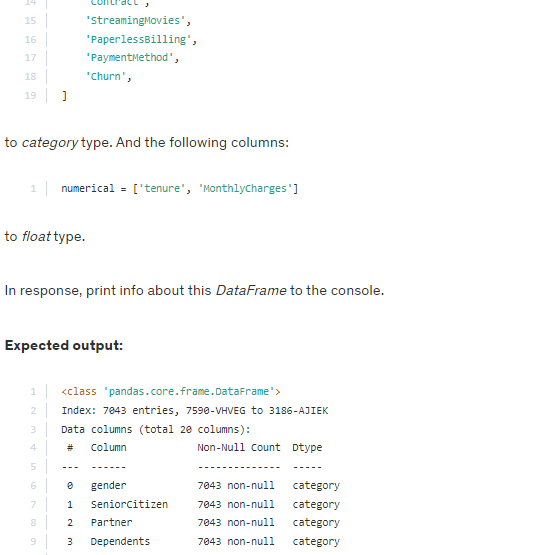

In [9]:
df[categorical] = df[categorical].astype('category')
df[numerical] = df[numerical].astype('float')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float64 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod 

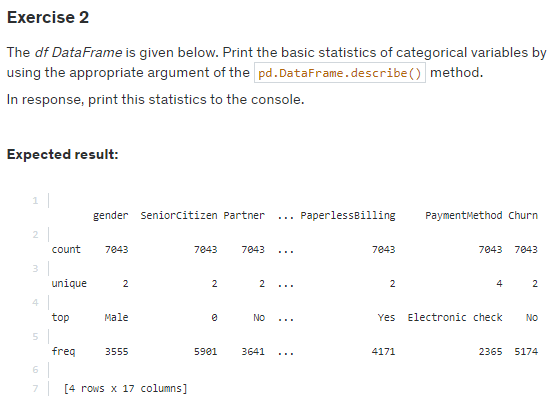

In [12]:
print(df.describe(include = 'category'))

       gender  SeniorCitizen Partner Dependents PhoneService MultipleLines  \
count    7043           7043    7043       7043         7043          7043   
unique      2              2       2          2            2             3   
top      Male              0      No         No          Yes            No   
freq     3555           5901    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-t

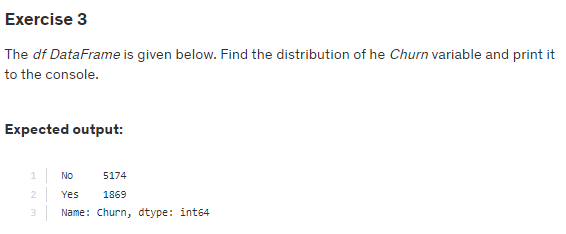

In [16]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64
